In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
# Creting Dataset (M1, M2 and R)
m1 = []
m2 = []
r = []
for i in range(1000):
    # Smaller Object
    m1.append(np.random.randint(100, 1000))
    # Bigger Object
    m2.append(np.random.randint(10000, 100000))
    # Radius between Objects
    r.append(np.random.randint(1, 100) / 10)

In [3]:
# Generating Equation
gravitation_constant = 6.67 * (10**(-11))
force = []
product = []
for i in range(1000):
    p = m1[i] * m2[i]
    f = gravitation_constant * (p / (r[i] ** 2))
    force.append(f)
    product.append(p)

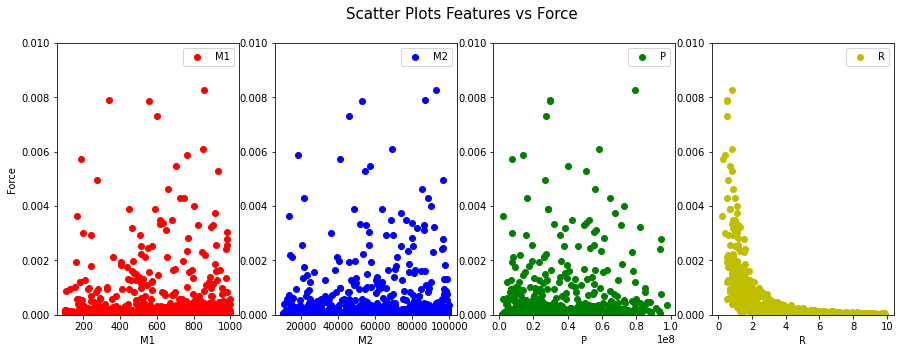

In [4]:
# # Visualizing Scatter plot for Outliers
fig, axis = plt.subplots(1, 4, figsize=(15,5))
labels = ['m1', 'm2', 'p', 'r']
c = ['r', 'b', 'g', 'y']
features = [m1, m2, product, r]
axis[0].set_ylabel("Force")
fig.suptitle('Scatter Plots Features vs Force', fontsize = 15)
for i in range(len(labels)):
    axis[i].set_xlabel(labels[i].upper())
    axis[i].set_ylim(0, 0.01)
    axis[i].scatter(features[i], force, label=labels[i].upper(), c=c[i])
    axis[i].legend()

In [14]:
# Creating Dataframe
df = pd.DataFrame({"m1": m1, "m2": m2, "r": r, "F": force})
#df = pd.DataFrame({"r": r, 'pr': product, "F": force})

In [15]:
df = df[df['F'] < 0.01]

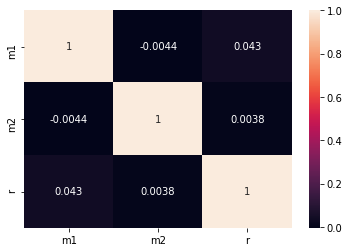

In [16]:
# Visualizing Correlations
sns.heatmap(df.iloc[:, :-1].corr(), annot=True)

In [17]:
df.iloc[:, :-1] = StandardScaler().fit_transform(df.iloc[:, :-1])

In [29]:
# Fitting a Model
est = RandomForestRegressor()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
est.fit(X, y)
print(est.feature_importances_)

[0.13685877 0.14138796 0.72175326]


Text(0.5, 0.98, "Partial dependence on Newton's Law of Gravitation")

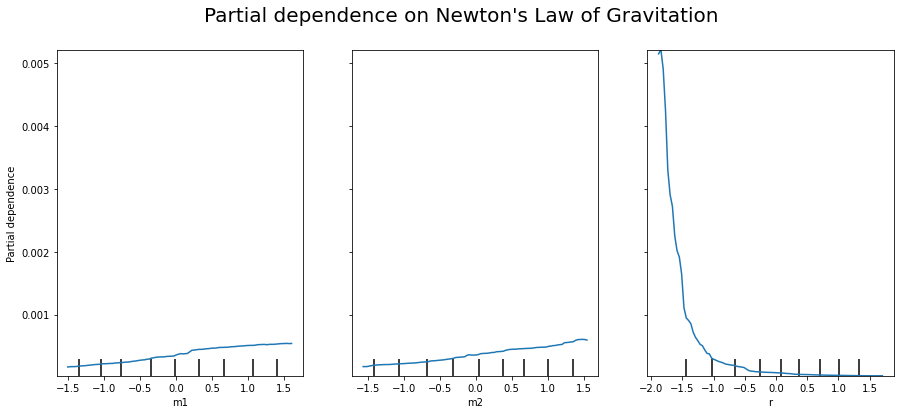

In [30]:
# Plotting Partial Dependence
fig = plt.gcf()
fig.set_size_inches(15, 6)
plot_partial_dependence(est, df.iloc[:, :-1], ['m1', 'm2', "r"], fig = fig)
fig.suptitle("Partial dependence on Newton's Law of Gravitation", fontsize = 20)

In [31]:
def get_distribution(col_name, data, model):
    x = data.copy()
    sequence = np.linspace(np.min(data[col_name]), np.max(data[col_name]), len(data[col_name]))
    #sequence = list(data[col_name])
    sequence.sort()
    y_dist = []
    ice_avgs = []
    for elem in sequence:
        x[col_name] = elem
        y_temp = model.predict(x)
        y_dist.append(np.mean(y_temp))
        
        ice_avgs.append(y_temp)
        
    return sequence, y_dist, ice_avgs

In [42]:
def plot_PDP(col_name, data, model):
    plt.figure(figsize = (10, 8))
    plt.grid()
    res = get_distribution(col_name, data, model)
    plt.plot(res[0], res[1], lw = 2, label = 'Trend')
    plt.xlabel('Mass of Second object')
    plt.ylabel("Force")
    plt.legend(fontsize = 'large')
    plt.tight_layout()

In [33]:
def plot_ICE(col_name, data, model):
    res = get_distribution(col_name, data, model)
    x = res[0]
    ice_avgs = res[2]
    plt.figure(figsize = (12, 8))
    plt.grid()
    for row in range(len(ice_avgs[0])):
        ys = []
        for item in range(len(ice_avgs)):
            ys.append(ice_avgs[item][row])
        plt.plot(x, ys, c = 'black', alpha = 0.1)
        
    plt.plot(res[0], res[1], lw = 5, c = 'r', label = 'Avg. Trend (PDP)')
    plt.xlabel('Distance between two objects')
    plt.ylabel("Force")
    plt.legend(fontsize = 'large')
    plt.tight_layout()

In [34]:
len(df)

970

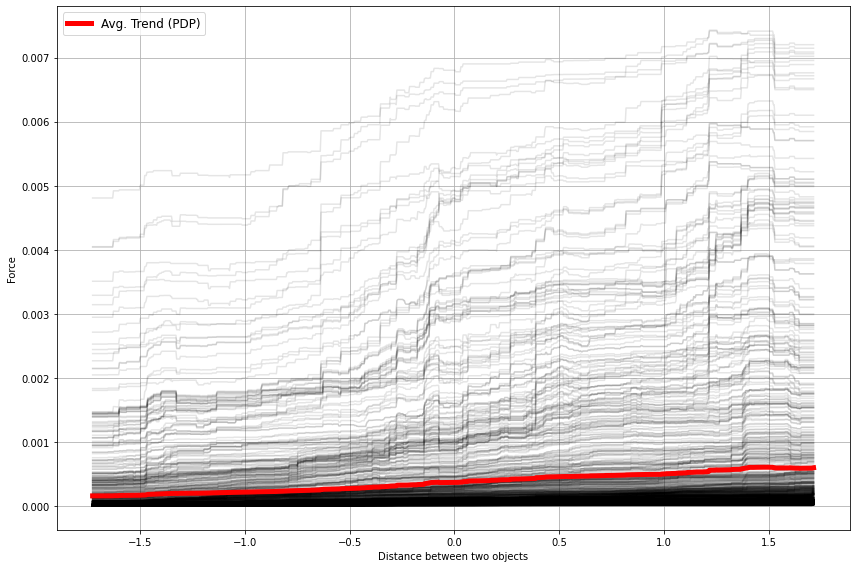

In [44]:
plot_ICE('m2', df.iloc[:, :-1], est)